In [1]:
%cd "C:\Users\z5232746\OneDrive - UNSW\North West Shelf\Sedimentary Layer data\NCB\Line two through Dampier\Flexural\Neogene\5Km_Te" #change the active directory to where your csv files are
import matplotlib.pyplot as plt
import math
from functools import partial
import numpy as np
from scipy.optimize import bisect
from scipy.optimize import fsolve

import pandas as pd
import os
print(os.getcwd()) #displays the idrectory


[WinError 3] The system cannot find the path specified: 'C:\\Users\\z5232746\\OneDrive - UNSW\\North West Shelf\\Sedimentary Layer data\\NCB\\Line two through Dampier\\Flexural\\Neogene\\5Km_Te #change the active directory to where your csv files are'
C:\Users\pmakl\OneDrive - UNSW\North West Shelf\Sedimentary Layer data\NCB\Line two through Dampier\Flexural\Neogene\5Km_Te
C:\Users\pmakl\OneDrive - UNSW\North West Shelf\Sedimentary Layer data\NCB\Line two through Dampier\Flexural\Neogene\5Km_Te


In [2]:
%cd "C:\Users\z5232746\OneDrive - UNSW\North West Shelf\Sedimentary Layer data\NCB\Line two through Dampier\Flexural\Neogene\5Km_Te"

[WinError 3] The system cannot find the path specified: 'C:\\Users\\z5232746\\OneDrive - UNSW\\North West Shelf\\Sedimentary Layer data\\NCB\\Line two through Dampier\\Flexural\\Neogene\\5Km_Te'
C:\Users\pmakl\OneDrive - UNSW\North West Shelf\Sedimentary Layer data\NCB\Line two through Dampier\Flexural\Neogene\5Km_Te


In [3]:
#Isostasy from removing a section 
y_l=125     #initial lithosphere thickness=125 km
y_c= 38   #initial thickness of continental crust = ??
ρ_m=3300      #density of the mantle at 0°C=3300kg/m^3  
ρ_c=2800        #density of the crust=2800kg/m^3
α_v=3.28*10**(-5)    #volumetric coefficient of thermal expansion=3.28*10^(-5)/°C
T_m= 1333     #mantle temperature=1333°C
ρ_s=2720    #sediment density=??
β=1.5      #stretching fator
λ=500   #wavelength of the sediment load 
g = 9.81
E = 6.5*10**10     #modulous of elasticity
Te =5   #Elastic Thickness of the crust
ρ_w = 1030 # density of water 
v = 0.25 #poissons ratio
s = pd.read_csv('Cenozoic_thicknesses.csv')
s = s.values
pi = 3.14
e =  2.71828
ꚍ = 62.8
t = 80
k = 8*10**-7 # thermal diffusivity

In [4]:
#Sibsidence from rifting (Mckenzie 1978)
Subsidence = y_l*((ρ_m-ρ_c)*(y_c/y_l)*(1-α_v*(T_m*y_c/(2*y_l)))-α_v*T_m*ρ_m/2)*(1-(1/β))/(ρ_m*(1-α_v*T_m)-ρ_w)
Subsidence

1.545516010899568

In [5]:
#Permian Extension

β= 1.5
t = 260-20
ThermalSubsidence1 = (4*y_l*ρ_m*α_v*T_m)/(pi**2*(ρ_m-ρ_w))*(β/pi)*math.sin(pi/β)*e**(-t/(62.8))
ThermalSubsidence1


0.02921042731015176

In [6]:
#Norian Extension
β= 1.46
t = 215-20
ThermalSubsidence2 = (4*y_l*ρ_m*α_v*T_m)/(pi**2*(ρ_m-ρ_w))*(β/pi)*math.sin(pi/β)*e**(-t/(62.8))
ThermalSubsidence2

0.05619262042004572

In [7]:
#Callovian Extension
β= 1.15
t = 163-20
ThermalSubsidence3 = (4*y_l*ρ_m*α_v*T_m)/(pi**2*(ρ_m-ρ_w))*(β/pi)*math.sin(pi/β)*e**(-t/(62.8))
ThermalSubsidence3


0.04840110541140621

In [8]:
#Tithonian Extension
β= 1.05
t = 145-20
ThermalSubsidence4 = (4*y_l*ρ_m*α_v*T_m)/(pi**2*(ρ_m-ρ_w))*(β/pi)*math.sin(pi/β)*e**(-t/(62.8))
ThermalSubsidence4


0.022170778600502872

In [9]:
ThermalSubsidence = ThermalSubsidence1+ThermalSubsidence2+ThermalSubsidence3+ThermalSubsidence4
ThermalSubsidence

0.15597493174210655

In [10]:
InitialSubsidence = (4*y_l*ρ_m*α_v*T_m)/(pi**2*(ρ_m-ρ_w))*(β/pi)*math.sin(pi/β)*e**(-0/ꚍ)
InitialSubsidence

0.1622631927552288

In [11]:
FinalSubsidence = Subsidence + InitialSubsidence - ThermalSubsidence
FinalSubsidence

1.55180427191269

In [12]:
Isostatic_Responses = []
for i in range(97):
    Isostasy = ((ρ_m-ρ_s)*g)/(((ρ_m-ρ_s)*g)+((E*Te**3/(12*(1-v**2)))*(2*pi/λ)**4))*s[i]*(ρ_m-ρ_s)/(ρ_m-ρ_w)
    Isostatic_Responses.append(Isostasy)
    
    
Neogene_Isostasy = np.array(Isostatic_Responses)
Neogene_Isostasy = np.around(Neogene_Isostasy, decimals=4)
np.savetxt('Neogene_Isostasy_Te5Km.csv',Neogene_Isostasy, fmt='%1.3f', delimiter=" ")

#print(Cenozioc_Isostasy)

In [13]:
bottoms = pd.read_csv('oldBottoms.csv') # Import current bottom surface depths
tops = pd.read_csv('oldTops.csv')    # Import current top surface depths
Constants = pd.read_csv('Line 2 Dampier_Constants.csv') # Import layer properties (denisty, porsity constants etc)


#converting csv files to numpy arrays for smooth mathematical operations
bottoms = bottoms.values
tops = tops.values
Constants = Constants.values

#rearranging matrices into nice format according to the code
Constants = np.transpose(Constants)


# n = int(input('number of layers or timesteps:'))
# m = int(input('number of points per layer :'))
n = 6
m = 97
# assigning the properties to specific numpy arrays
Q0 = Constants[0,:] # i.e Q0 = [0.49, 0.56, 0.63, 0.56, 0.63]
c = Constants[1,:] # i.e c = [0.27, 0.39, 0.56, 0.39, 0.56]
Rho = Constants[2,:] # i.e Rho = [2700, 2650, 2400, 2650, 2400]


NewBase = [] #output array for the bisection method
DecDepth = [] # output array for decompacted depth values 
Isostasy = [] # output list of isostatic responses 
Thickness = [] # output list of decompacted and compacted thicknesses
EustaticResp = [] # output list of eustatic responses


rhoM = 3300 # density of mantle
rhoW = 1030 # density of sea water
e = 2.718


In [14]:
#Adjusting the basement afer removing a sedimentary layer: correcting for isostasy and thermal subsidence 
oldBase = pd.read_csv('oldBase.csv')
oldBase = oldBase.values
newbottoms = []

for i in range (0,97):
    if i>=0 and i <=78:
        newbase = oldBase[i] - Neogene_Isostasy[i] - 0.03  
        newbottoms.append(newbase)
    
    if i >=79 and i <= 88:
        newbase = oldBase[i] - Neogene_Isostasy[i] - 0.16
        newbottoms.append(newbase)
    
        
    if i >=89 and i <= 97:
        newbase = oldBase[i] - Neogene_Isostasy[i] - 0.03
        newbottoms.append(newbase)
    #i+=1
newbottoms = np.array(newbottoms)
newbottoms = np.around(newbottoms, decimals=4)
np.savetxt('newbottoms.csv',newbottoms, fmt='%1.3f', delimiter=" ") #new base 

#print(newbottoms)

In [15]:
#Decompacting the bottom layers after removing the top layer: calculating decompacted top surface depth for bottm layer
Dectop = []
Dectop2 = []
Dectop5 = []

def f(NewTop, NewBttm, OldTop, OldBttm, Q0, c):
    
    LHS = NewBttm - NewTop
    
    RHS = (OldBttm-OldTop) - (Q0/c)*(e**(-c*OldTop)-e**(-c*OldBttm)) + (Q0/c)*(e**(-c*NewTop)-e**(-c*NewBttm)) 
    return LHS - RHS


for i in range(97):
    g1 = partial(f, NewBttm=newbottoms[i], OldTop=tops[i][0], OldBttm=bottoms[i][0], Q0=Q0[-1],c=c[-1])
    TopNew = []
    TopNew = fsolve(g1, 0)
    Dectop.append(TopNew)
    np.savetxt('Decompacted Depth1.csv',Dectop, fmt='%1.3f', delimiter=" ")


In [16]:
#Second layer from bottom
Dectop2 = []

def f(NewTop, NewBttm, OldTop, OldBttm, Q0, c):
    
    LHS = NewBttm - NewTop
    
    RHS = (OldBttm-OldTop) - (Q0/c)*(e**(-c*OldTop)-e**(-c*OldBttm)) + (Q0/c)*(e**(-c*NewTop)-e**(-c*NewBttm)) 
    return LHS - RHS


for i in range(97):
    
    g1 = partial(f, NewBttm=Dectop[i], OldTop=tops[i][1], OldBttm=bottoms[i][1], Q0=Q0[-2],c=c[-2])
    TopNew = []
    TopNew = fsolve(g1, 0)
    Dectop2.append(TopNew)
    np.savetxt('Decompacted Depth2.csv',Dectop2, fmt='%1.3f', delimiter=" ")


In [17]:
#third layer from bottom
Dectop3 = []

def f(NewTop, NewBttm, OldTop, OldBttm, Q0, c):
    
    LHS = NewBttm - NewTop
    
    RHS = (OldBttm-OldTop) - (Q0/c)*(e**(-c*OldTop)-e**(-c*OldBttm)) + (Q0/c)*(e**(-c*NewTop)-e**(-c*NewBttm)) 
    return LHS - RHS


for i in range(97):
  
    g1 = partial(f, NewBttm=Dectop2[i], OldTop=tops[i][2], OldBttm=bottoms[i][2], Q0=Q0[-3],c=c[-3])
    TopNew = []
    TopNew = fsolve(g1, 0)
    Dectop3.append(TopNew)
    np.savetxt('Decompacted Depth3.csv',Dectop3, fmt='%1.3f', delimiter=" ")

In [18]:
#4th layer from the bottom
Dectop4 = []

def f(NewTop, NewBttm, OldTop, OldBttm, Q0, c):
    
    LHS = NewBttm - NewTop
    
    RHS = (OldBttm-OldTop) - (Q0/c)*(e**(-c*OldTop)-e**(-c*OldBttm)) + (Q0/c)*(e**(-c*NewTop)-e**(-c*NewBttm)) 
    return LHS - RHS


for i in range(97):
    
    g1 = partial(f, NewBttm=Dectop3[i], OldTop=tops[i][3], OldBttm=bottoms[i][3], Q0=Q0[-4],c=c[-4])
    TopNew = []
    TopNew = fsolve(g1, 0)
    Dectop4.append(TopNew)
    np.savetxt('Decompacted Depth4.csv',Dectop4, fmt='%1.3f', delimiter=" ")


In [19]:
#5th layer from the bottom
Dectop5 = []

def f(NewTop, NewBttm, OldTop, OldBttm, Q0, c):
    
    LHS = NewBttm - NewTop
    
    RHS = (OldBttm-OldTop) - (Q0/c)*(e**(-c*OldTop)-e**(-c*OldBttm)) + (Q0/c)*(e**(-c*NewTop)-e**(-c*NewBttm)) 
    return LHS - RHS


for i in range(97):
    
    g1 = partial(f, NewBttm=Dectop4[i], OldTop=tops[i][4], OldBttm=bottoms[i][4], Q0=Q0[-5],c=c[-5])
    TopNew = []
    TopNew = fsolve(g1, 0)
    Dectop5.append(TopNew)
    np.savetxt('Decompacted Depth5.csv',Dectop5, fmt='%1.3f', delimiter=" ")


In [20]:
#reading csv files from the folder using pandas 
bottoms = pd.read_csv('Distance.csv') # horizontal distance

#converting csv files to numpy arrays for smooth mathematical operations
bottoms = bottoms.values
Horizontal_distance = bottoms[:,0]


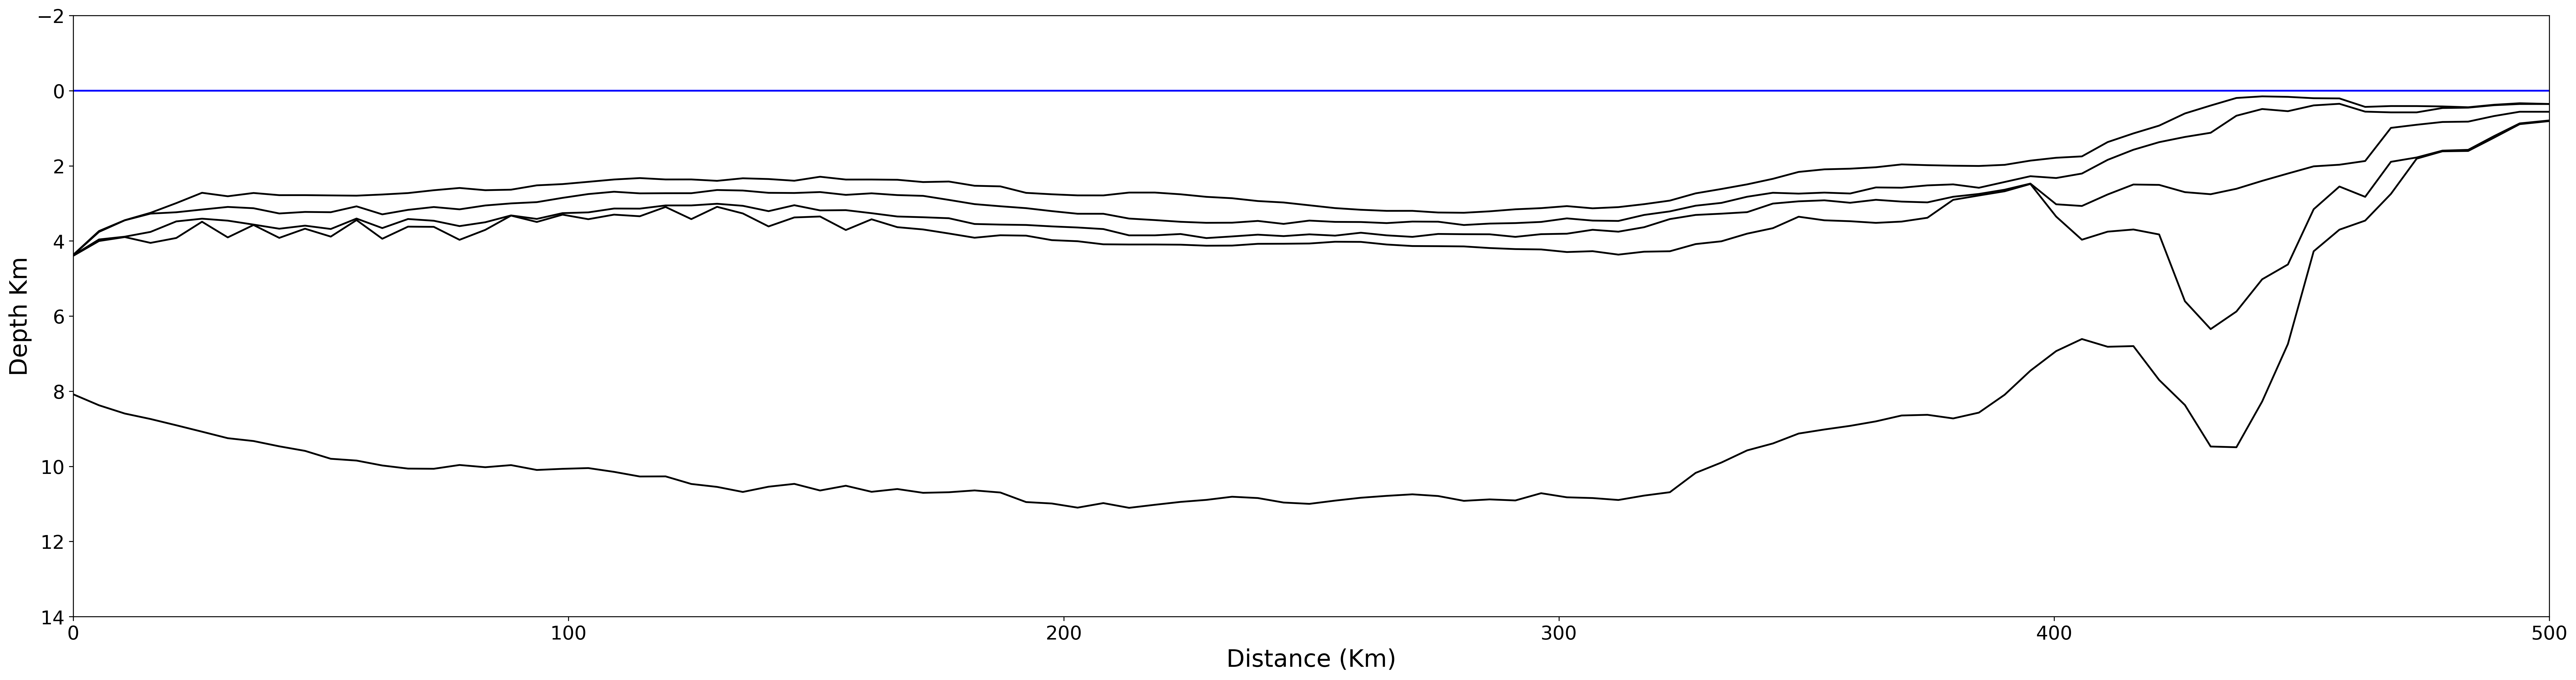

<Figure size 432x288 with 0 Axes>

In [21]:
# ******** PLOTTING USING MATPLOTLIB *******
figure, ax1 = plt.subplots(figsize = (30, 8), dpi = 300, linewidth =5)

color = 'tab:red'
ax1.set_xlabel('Distance (Km)', fontsize=20, color='black')
ax1.set_ylabel('Depth Km', color='black', fontsize=20)
plt.ylim(14, -2)
plt.xlim(0, 500)
ax1.plot(Horizontal_distance, newbottoms, color='black', )

#ax1.plot(Horizontal_distance, Dectop, color='black', )
ax1.plot(Horizontal_distance, Dectop2, color='black', )
ax1.plot(Horizontal_distance, Dectop3, color='black', )
ax1.plot(Horizontal_distance, Dectop4, color='black', )
ax1.plot(Horizontal_distance, Dectop5, color='black', )
#ax1.plot(Horizontal_distance, Mandu, color='blue', )
x = Horizontal_distance
plt.plot(x,np.zeros(len(x)), color = 'blue')


ax1.tick_params(axis='y', labelcolor='black', labelsize=16)
ax1.tick_params(axis='x', labelcolor='black', labelsize=16)
#plt.grid(b=None, which='major', axis='x', color='black', linestyle='dotted', linewidth=0.2)


figure.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
#ax1.set_title('Backstripped', fontsize=16, color='black')
plt.savefig("Neogene.png")
figure.savefig("Neogene5km.png")


In [22]:
data = pd.read_csv('Decompacted_Neogene.csv')
distance = data['Distance']
bottom = data['Bottom']
mungaroo = data['Mungaroo']
brigadier = data['Brigadier']
dingo = data['Dingo']
gearlie = data['Gearlie']
walcott = data['Walcott']


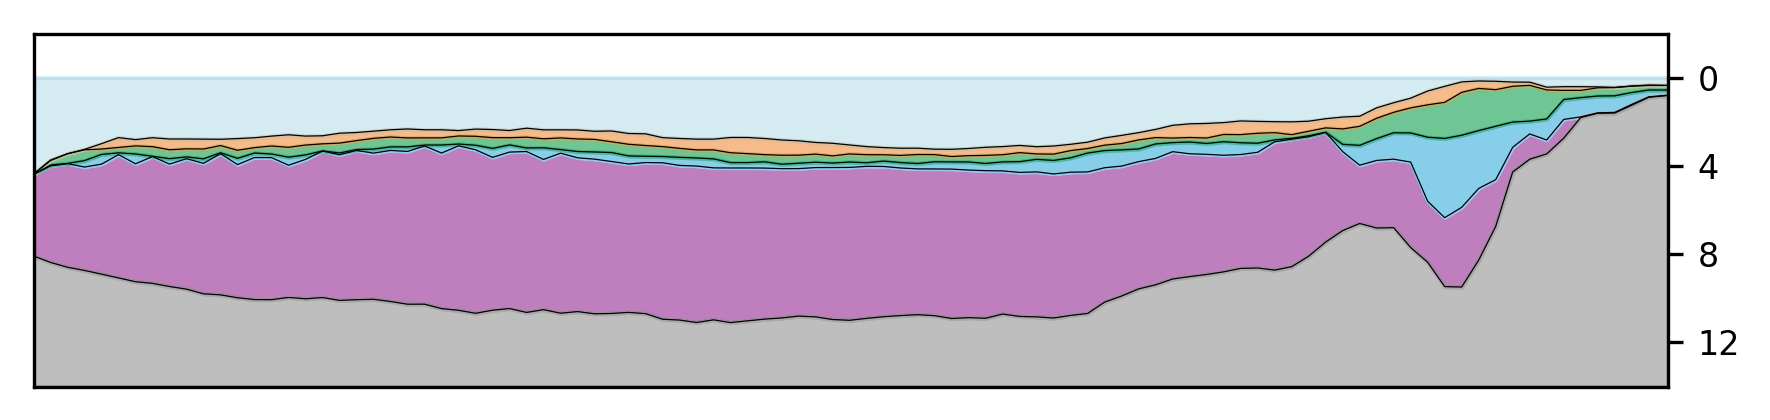

<Figure size 432x288 with 0 Axes>

In [23]:
figure, ax1 = plt.subplots(figsize = (6, 1.5), dpi = 300, linewidth =0.5)

fontsize = 8
linewidth =0.3
plt.rcParams['axes.linewidth']=0.5
plt.tick_params(axis = "x", which = "both", bottom = False, top = False) # removes tick marks from x axis
y_ticks = np.arange(0, 14, 4) #sets the interval for tick marck
plt.yticks(y_ticks)
ax1.yaxis.set_ticks_position("right")   # changes the position of y axis between left and right
ax1.tick_params(axis='x', labelcolor='black', labelsize=35,  labelbottom=False)


color = 'tab:red'
#ax1.set_xlabel('Distance (Km)', fontsize=30, color='black')
#ax1.set_ylabel('Depth Km', color='black', fontsize=30)
plt.ylim(14, -2)
plt.xlim(0, 500)
ax1.plot(distance, bottom, color='black', linewidth =linewidth)

ax1.fill_between(distance, bottom, brigadier, alpha=0.5, color='purple')

#ax1.plot(distance, mungaroo, color='black', )
ax1.plot(distance, brigadier, color='black', linewidth =linewidth)
ax1.fill_between(distance, brigadier, dingo, alpha=1, color='skyblue')

ax1.plot(distance, dingo, color='black', linewidth =linewidth)
ax1.fill_between(distance, dingo, gearlie, alpha=0.75, color='mediumseagreen')

ax1.plot(distance, gearlie, color='black', linewidth =linewidth)
ax1.fill_between(distance, gearlie, walcott, alpha=0.75, color='sandybrown')

ax1.plot(distance, walcott, color='black', linewidth =linewidth)
ax1.fill_between(distance, walcott, alpha=0.5, color='lightblue')

#ax1.plot(Horizontal_distance, Mandu, color='blue', )
x = distance
plt.plot(x,np.zeros(len(x)), alpha=0.5, color = 'lightblue', linewidth = linewidth)
y = 14
ax1.fill_between(distance, bottom, y, alpha=0.75, color='darkgrey')

ax1.tick_params(axis='y', labelcolor='black', labelsize=fontsize)
ax1.tick_params(axis='x', labelcolor='black', labelsize=fontsize)
#plt.grid(b=None, which='major', axis='x', color='black', linestyle='dotted', linewidth=0.2)

figure.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
#ax1.set_title('Backstripped', fontsize=16, color='black')
plt.savefig("Neogene.png")
figure.savefig("Neogene5km2.png")

